<a href="https://colab.research.google.com/github/miguelangel18241/Probabilities/blob/main/NN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the training and test data files
uploaded = files.upload()

# Load the training and test data into pandas DataFrames
AtRiskStudentsTraining = pd.read_csv('AtRiskStudentsTraining.csv')
AtRiskStudentsTest = pd.read_csv('AtRiskStudentsTest.csv')


Saving AtRiskStudentsTest.csv to AtRiskStudentsTest.csv
Saving AtRiskStudentsTraining.csv to AtRiskStudentsTraining.csv


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

# Load the training and test data
AtRiskStudentsTraining = pd.read_csv('AtRiskStudentsTraining.csv')
AtRiskStudentsTest = pd.read_csv('AtRiskStudentsTest.csv')

# Separate features and labels
X_train = AtRiskStudentsTraining.iloc[:, :-1]
y_train = AtRiskStudentsTraining.iloc[:, -1]
X_test = AtRiskStudentsTest.iloc[:, :-1]
y_test = AtRiskStudentsTest.iloc[:, -1]

# Function to train and evaluate NN for given configuration
def train_and_evaluate(hidden_layers, neurons):
    # Initialize the neural network classifier
    model = MLPClassifier(hidden_layer_sizes=hidden_layers, activation='relu', random_state=1)

    # Train the neural network
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate error (Mean Squared Error)
    error = mean_squared_error(y_test, y_pred)

    return error

# Define the range of hidden layers and neurons
hidden_layers_range = [(n,) for n in range(1, 11)]
neurons_range = [n for n in range(5, 15)]

# Initialize lists to store results
results = []

# Iterate over each combination of hidden layers and neurons
for hidden_layers in hidden_layers_range:
    for neurons in neurons_range:
        # Train and evaluate NN for the current configuration
        error = train_and_evaluate(hidden_layers, neurons)

        # Append the results to the list
        results.append((hidden_layers[0], neurons, error))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Hidden Layer', 'Neurons', 'Error'])

# Print the DataFrame
# print(results_df)
# Save the DataFrame to a CSV file
results_df.to_csv('results.csv', index=False)




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
files.download('results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

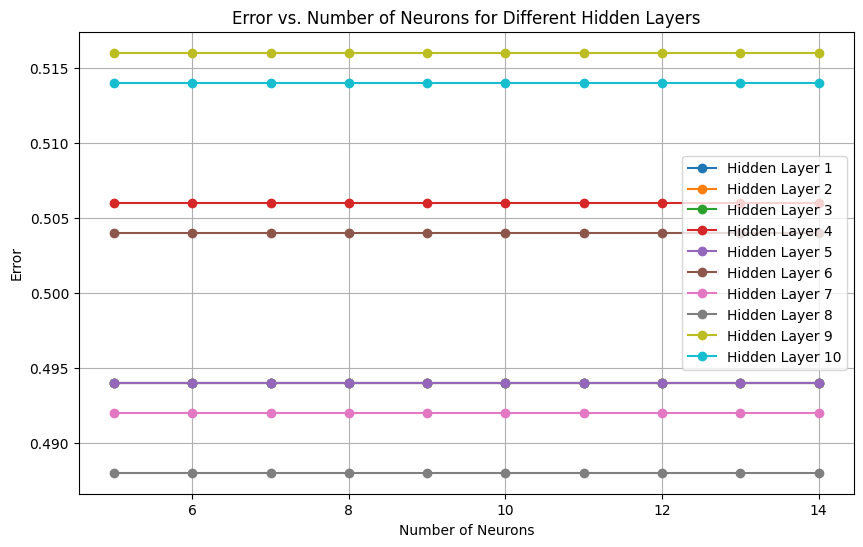

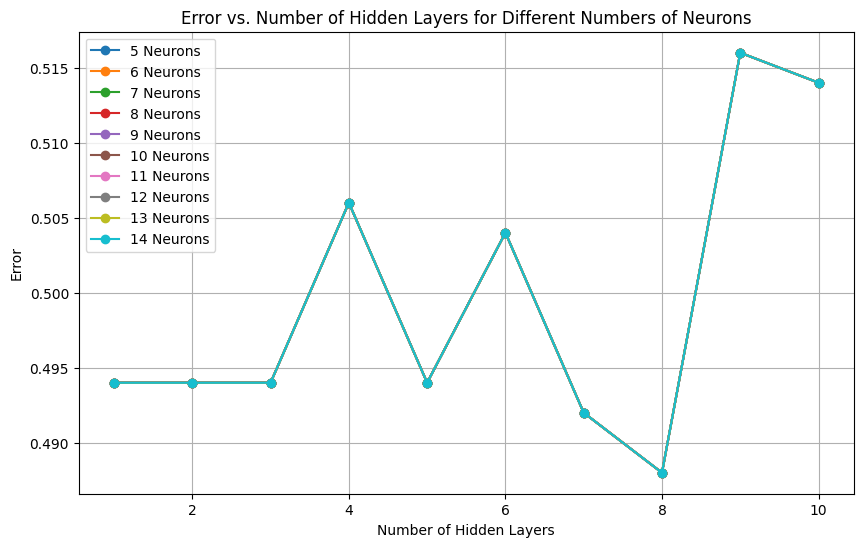

In [ ]:
import matplotlib.pyplot as plt

# Group the results by Hidden Layer and Neurons
grouped_hidden_layers = results_df.groupby('Hidden Layer')
grouped_neurons = results_df.groupby('Neurons')

# Plot for Hidden Layers
plt.figure(figsize=(10, 6))
for name, group in grouped_hidden_layers:
    plt.plot(group['Neurons'], group['Error'], marker='o', label=f'Hidden Layer {name}')
plt.title('Error vs. Number of Neurons for Different Hidden Layers')
plt.xlabel('Number of Neurons')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Neurons
plt.figure(figsize=(10, 6))
for name, group in grouped_neurons:
    plt.plot(group['Hidden Layer'], group['Error'], marker='o', label=f'{name} Neurons')
plt.title('Error vs. Number of Hidden Layers for Different Numbers of Neurons')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()
